<a href="https://colab.research.google.com/github/rg81073/Machine_Learning_Projects/blob/main/Car_Price_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The given dataset contains information about various cars, including their names, manufacturing years, selling prices, present prices, kilometers driven, fuel types, seller types, transmission types, and number of owners. Let's use this information to create a description for the car dataset:

The car dataset comprises details of different car models along with their characteristics and historical information. Each entry in the dataset includes the following features:

Car_Name: The name of the car model, representing the brand and specific version of the car.

Year: The year in which the car was manufactured, indicating its age.

Selling_Price: The current selling price of the car, which might be influenced by factors like demand, condition, and market trends.

Present_Price: The original price of the car when it was purchased new, providing an insight into its depreciation over time.

Kms_Driven: The total distance the car has been driven in kilometers, which gives an idea of its usage and wear.

Fuel_Type: The type of fuel the car uses, such as petrol, diesel, or other variants.

Seller_Type: A categorical variable indicating whether the seller is an individual or a dealer, affecting the pricing and service options.

Transmission: A categorical feature specifying whether the car has a manual or automatic transmission.

Owner: The number of previous owners the car had, reflecting its ownership history.

Importing the Dependencies..!!

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Preprocessing

In [2]:
# Loading the data from csv file to pandas DataFrame

car_dataset = pd.read_csv("/content/car data.csv")

In [3]:
# Inspeccting the First 5 rows of the DataFrame

car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Checking the Number of rows and columns

car_dataset.shape

(301, 9)

In [5]:
# Getting Some information about the dataset

car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Checking the Number of Missing Values

car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# Checing the Distribution of Categorical data

print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Column

In [8]:
# Encoding the 'Fuel_Type' Column
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding the 'Seller_Type' Column
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# Encoding the 'Transmission' Column
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the 'input data column' and 'target column'

---



In [10]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'],axis = 1)
Y= car_dataset['Selling_Price']

In [11]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [12]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting the dataset in to Training and Test data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)

**Model Training Using**

**1. Linear Regression**



In [14]:
# Loading the Linear regression model

lin_reg_model = LinearRegression()

In [15]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation : R-Square Error

In [16]:
# Prediction on Training data

training_data_prediction = lin_reg_model.predict(X_train)

In [17]:
# R- Squared Error

error_score = metrics.r2_score(Y_train, training_data_prediction)

print("R Squared Error : " , error_score  )          # R-square-error should be less for better accuracy score

R Squared Error :  0.8799451660493711


Visualizes the Actual Price and Predicted Price Using Scatter Plot on **training data**




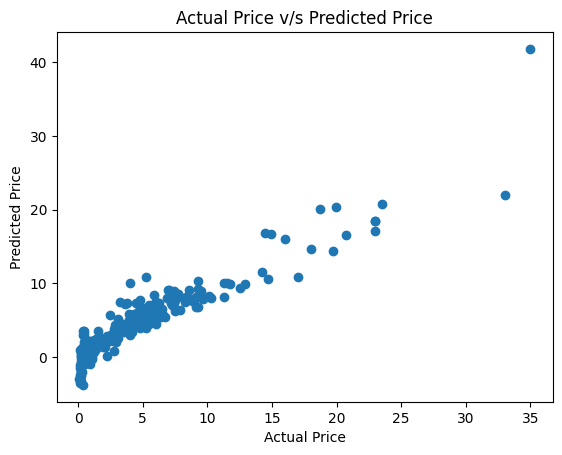

In [18]:
plt.scatter(Y_train ,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price v/s Predicted Price")
plt.show()

Now Prediction For Test Data...

In [19]:
# Prediction on Test data

test_data_prediction = lin_reg_model.predict(X_test)



In [20]:
# R- Squared Error

error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R Squared Error : " , error_score  )          # R-square-error should be less for better accuracy score

R Squared Error :  0.8365766715027051


Visualizes the Actual Price and Predicted Price Using Scatter Plot on **test data**

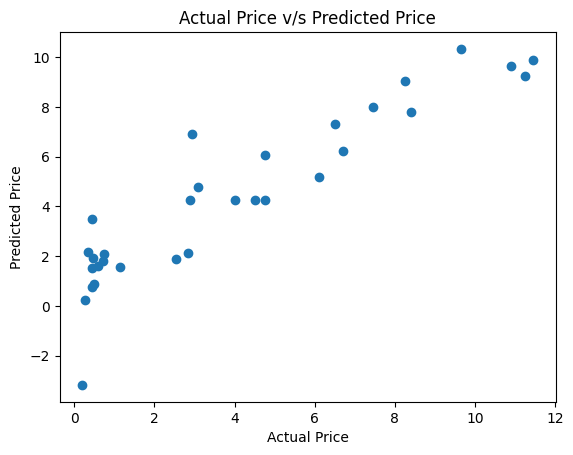

In [21]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price v/s Predicted Price')
plt.show()

**Model Training Using:**

**2. Lasso Regression**

In [22]:
# Importing the Lasso Regression Model

lass_reg_model = Lasso()

In [23]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation for **Lasso Regression**

In [24]:
training_data_prediction = lass_reg_model.predict(X_train)

In [25]:
# R- Squared Error

error_score = metrics.r2_score(Y_train, training_data_prediction)

print("R Squared Error : " , error_score  )          # R-square-error should be less for better accuracy score

R Squared Error :  0.8427856123435794


**Visualizes the Actual Price and Predicted Price Using Scatter Plot for Training data**




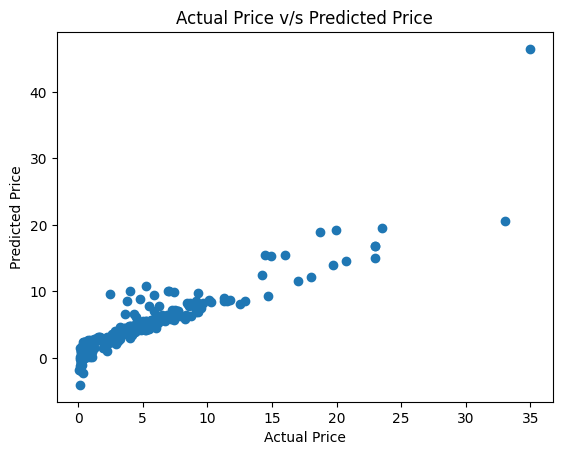

In [26]:
plt.scatter(Y_train ,training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Actual Price v/s Predicted Price")
plt.show()

In [27]:
# Prediction on Test data

test_data_prediction = lass_reg_model.predict(X_test)



In [28]:
# R- Squared Error

error_score = metrics.r2_score(Y_test, test_data_prediction)

print("R Squared Error : " , error_score  )          # R-square-error should be less for better accuracy score

R Squared Error :  0.8709167941173195


Visualizes the Actual Price and Predicted Price Using Scatter Plot for **Test data**

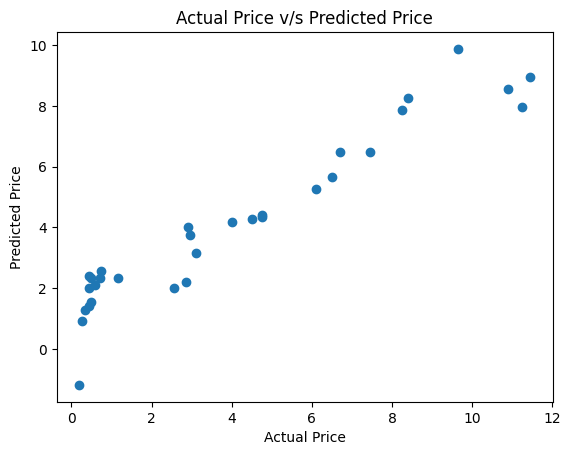

In [29]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price v/s Predicted Price')
plt.show()

**Project Successfully Completed...!!**